In [1]:
!git clone https://github.com/AkashDataScience/DeepLearningMaster.git

Cloning into 'DeepLearningMaster'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 37 (delta 15), reused 31 (delta 9), pack-reused 0
Receiving objects: 100% (37/37), 8.18 KiB | 2.73 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
!pip install torchsummary
!pip install torch-lr-finder

In [3]:
import torch
from DeepLearningMaster.Datasets import dataset
from DeepLearningMaster.Models.custom_resnet import Model
from DeepLearningMaster import train
from DeepLearningMaster import utils

In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=512, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

train_loader = dataset.get_train_data_loader(**dataloader_args)
test_loader = dataset.get_test_data_loader(**dataloader_args)

CUDA Available? True
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


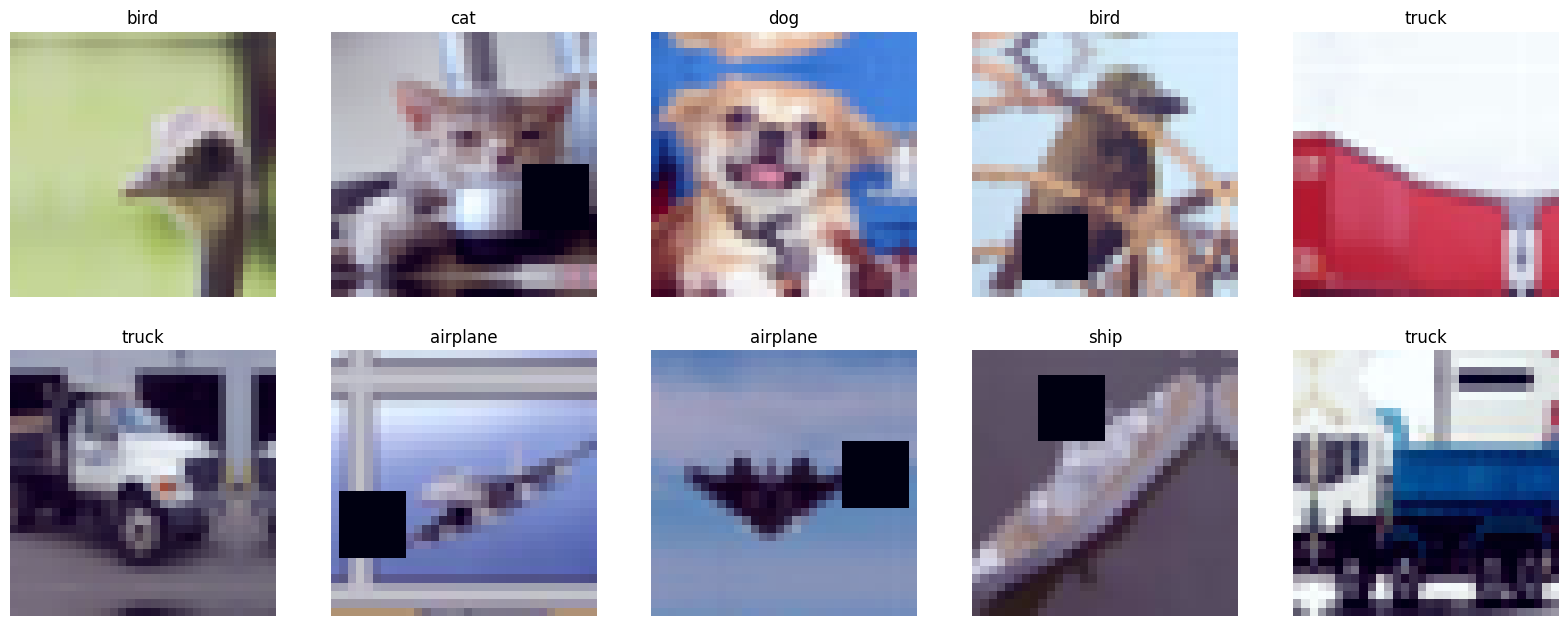

In [5]:
utils.plot_samples(train_loader)

In [6]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
         ResBlock-14          [-1,

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.87E-03


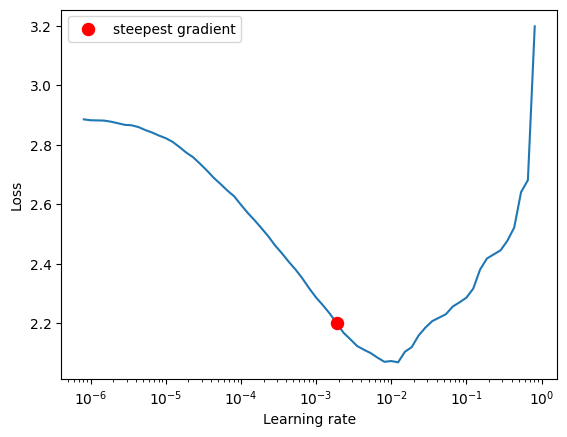

In [7]:
model = Model().to(device)
num_epoch = 24
optimizer = utils.get_Adam_optimizer(model, lr=1e-7, weight_decay=1e-2)
criterion = utils.get_cross_entropy_loss()

max_lr = utils.get_learning_rate(model, optimizer, criterion, device, train_loader)

In [8]:
scheduler = utils.get_OneCycleLR_scheduler(optimizer, max_lr=max_lr,  epochs=num_epoch,
                                           steps_per_epoch=len(train_loader), max_at_epoch=5,
                                           anneal_strategy = 'linear', div_factor=10,
                                           final_div_factor=1)

train_losses, train_acc, test_losses, test_acc = train.start_training(
    num_epoch, model, device, train_loader, test_loader, optimizer, criterion,
    scheduler
)

Epoch 1
Current learning rate: [0.0001873817422860384]


Train: Loss=1.0277 Batch_id=97 Accuracy=49.40: 100%|██████████| 98/98 [00:18<00:00,  5.26it/s]


Test set: Average loss: 1.1073, Accuracy: 5943/10000 (59.43%)

Epoch 2
Current learning rate: [0.0005253586271455188]


Train: Loss=0.7637 Batch_id=97 Accuracy=67.53: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s]


Test set: Average loss: 0.7805, Accuracy: 7315/10000 (73.15%)

Epoch 3
Current learning rate: [0.0008633355120049991]


Train: Loss=0.8614 Batch_id=97 Accuracy=74.21: 100%|██████████| 98/98 [00:19<00:00,  5.00it/s]


Test set: Average loss: 0.7506, Accuracy: 7361/10000 (73.61%)

Epoch 4
Current learning rate: [0.0012013123968644794]


Train: Loss=0.7230 Batch_id=97 Accuracy=76.08: 100%|██████████| 98/98 [00:19<00:00,  5.10it/s]


Test set: Average loss: 0.7754, Accuracy: 7249/10000 (72.49%)

Epoch 5
Current learning rate: [0.0015392892817239596]


Train: Loss=0.7418 Batch_id=97 Accuracy=76.74: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]


Test set: Average loss: 1.0583, Accuracy: 6699/10000 (66.99%)

Epoch 6
Current learning rate: [0.0018729117108944474]


Train: Loss=0.6424 Batch_id=97 Accuracy=77.36: 100%|██████████| 98/98 [00:19<00:00,  4.90it/s]


Test set: Average loss: 1.1379, Accuracy: 6240/10000 (62.40%)

Epoch 7
Current learning rate: [0.0017841519382326397]


Train: Loss=0.5542 Batch_id=97 Accuracy=78.33: 100%|██████████| 98/98 [00:19<00:00,  5.00it/s]


Test set: Average loss: 0.8525, Accuracy: 7101/10000 (71.01%)

Epoch 8
Current learning rate: [0.001695392165570832]


Train: Loss=0.5671 Batch_id=97 Accuracy=79.17: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]


Test set: Average loss: 0.8488, Accuracy: 7042/10000 (70.42%)

Epoch 9
Current learning rate: [0.0016066323929090243]


Train: Loss=0.6623 Batch_id=97 Accuracy=79.86: 100%|██████████| 98/98 [00:20<00:00,  4.90it/s]


Test set: Average loss: 1.1816, Accuracy: 6078/10000 (60.78%)

Epoch 10
Current learning rate: [0.0015178726202472166]


Train: Loss=0.6138 Batch_id=97 Accuracy=80.63: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.9174, Accuracy: 6744/10000 (67.44%)

Epoch 11
Current learning rate: [0.001429112847585409]


Train: Loss=0.6192 Batch_id=97 Accuracy=80.97: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.8994, Accuracy: 6982/10000 (69.82%)

Epoch 12
Current learning rate: [0.0013403530749236013]


Train: Loss=0.5469 Batch_id=97 Accuracy=81.77: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.8152, Accuracy: 7193/10000 (71.93%)

Epoch 13
Current learning rate: [0.0012515933022617936]


Train: Loss=0.5629 Batch_id=97 Accuracy=82.46: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]


Test set: Average loss: 0.6256, Accuracy: 7891/10000 (78.91%)

Epoch 14
Current learning rate: [0.0011628335295999859]


Train: Loss=0.5577 Batch_id=97 Accuracy=82.86: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]


Test set: Average loss: 0.7509, Accuracy: 7404/10000 (74.04%)

Epoch 15
Current learning rate: [0.0010740737569381782]


Train: Loss=0.4981 Batch_id=97 Accuracy=83.30: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


Test set: Average loss: 0.8202, Accuracy: 7221/10000 (72.21%)

Epoch 16
Current learning rate: [0.0009853139842763707]


Train: Loss=0.4557 Batch_id=97 Accuracy=83.99: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]


Test set: Average loss: 0.5577, Accuracy: 8161/10000 (81.61%)

Epoch 17
Current learning rate: [0.000896554211614563]


Train: Loss=0.5683 Batch_id=97 Accuracy=84.63: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]


Test set: Average loss: 0.4888, Accuracy: 8348/10000 (83.48%)

Epoch 18
Current learning rate: [0.0008077944389527551]


Train: Loss=0.4956 Batch_id=97 Accuracy=85.82: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


Test set: Average loss: 0.5605, Accuracy: 8150/10000 (81.50%)

Epoch 19
Current learning rate: [0.0007190346662909475]


Train: Loss=0.4296 Batch_id=97 Accuracy=86.30: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]


Test set: Average loss: 0.5282, Accuracy: 8257/10000 (82.57%)

Epoch 20
Current learning rate: [0.00063027489362914]


Train: Loss=0.4114 Batch_id=97 Accuracy=87.13: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]


Test set: Average loss: 0.4372, Accuracy: 8550/10000 (85.50%)

Epoch 21
Current learning rate: [0.0005415151209673321]


Train: Loss=0.3115 Batch_id=97 Accuracy=87.94: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


Test set: Average loss: 0.4886, Accuracy: 8369/10000 (83.69%)

Epoch 22
Current learning rate: [0.0004527553483055246]


Train: Loss=0.3206 Batch_id=97 Accuracy=89.01: 100%|██████████| 98/98 [00:20<00:00,  4.77it/s]


Test set: Average loss: 0.4715, Accuracy: 8447/10000 (84.47%)

Epoch 23
Current learning rate: [0.0003639955756437167]


Train: Loss=0.2477 Batch_id=97 Accuracy=90.40: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]


Test set: Average loss: 0.3257, Accuracy: 8937/10000 (89.37%)

Epoch 24
Current learning rate: [0.00027523580298190924]


Train: Loss=0.2561 Batch_id=97 Accuracy=91.75: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]


Test set: Average loss: 0.2959, Accuracy: 9057/10000 (90.57%)



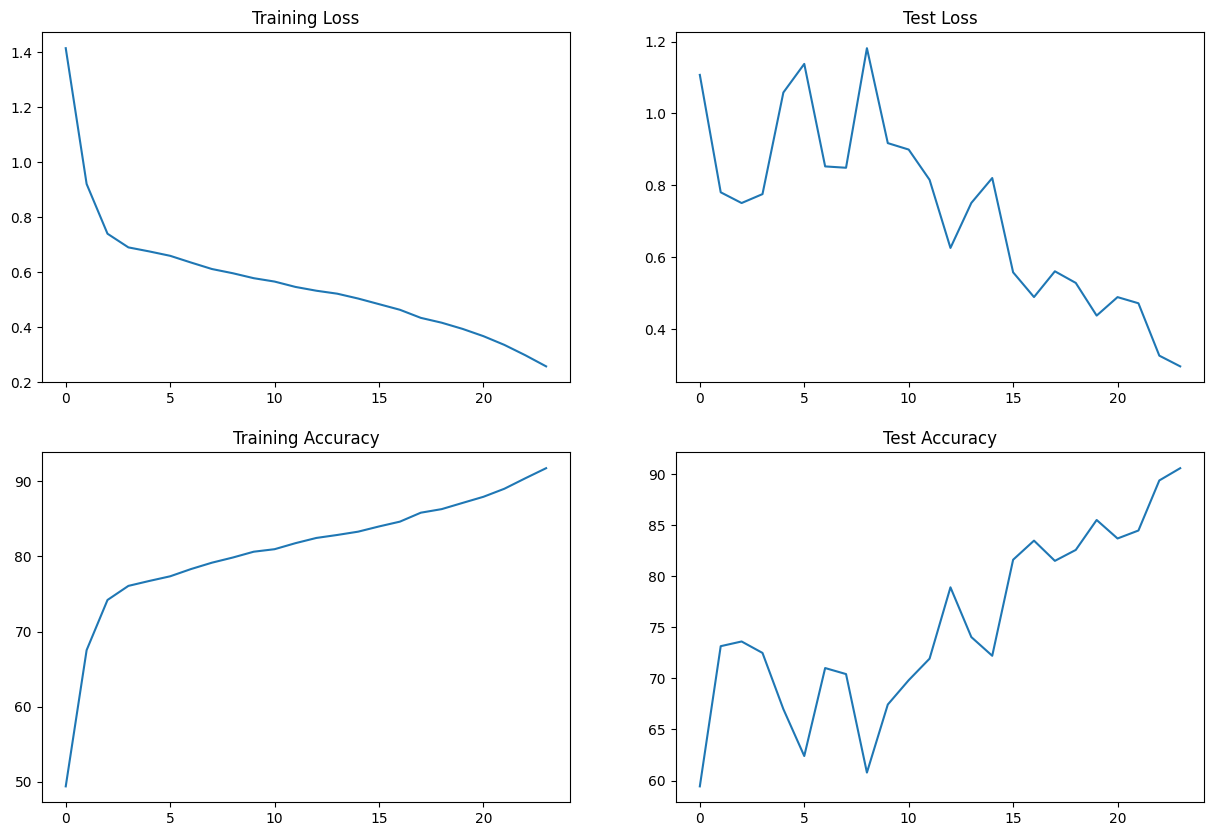

In [9]:
utils.plot_accuracy_loss_graphs(train_losses, train_acc, test_losses, test_acc)

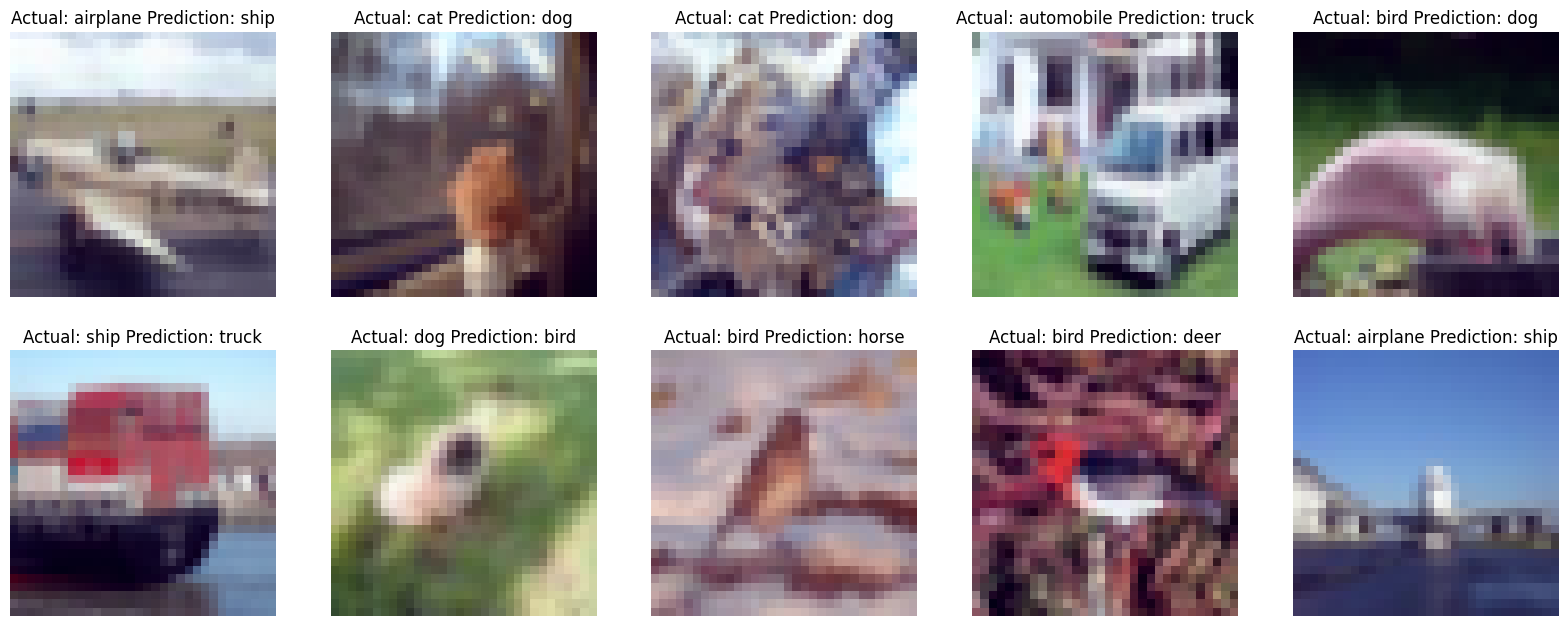

In [10]:
utils.plot_missclassified_images(device, model, test_loader)